In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-dat

True

In [1]:
#分词
from nltk.tokenize import word_tokenize
text = "Hello, how are you? Fine, Thank you, and you? I'm fine too."
tokens = word_tokenize(text)
print(tokens)

['Hello', ',', 'how', 'are', 'you', '?', 'Fine', ',', 'Thank', 'you', ',', 'and', 'you', '?', 'I', "'m", 'fine', 'too', '.']


In [2]:
#可设定规则的分词
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') #括号里是设定的规则
tokens = tokenizer.tokenize(text)
print(tokens)

['Hello', 'how', 'are', 'you', 'Fine', 'Thank', 'you', 'and', 'you', 'I', 'm', 'fine', 'too']


In [3]:
#按句子分句
from nltk.tokenize import sent_tokenize
text = "Hello, how are you? Fine, Thank you, and you? I'm fine too."
sentences = sent_tokenize(text)
print(sentences)

['Hello, how are you?', 'Fine, Thank you, and you?', "I'm fine too."]


In [4]:
#判断语义相似度
from nltk.corpus import wordnet
word1 = wordnet.synset('mother.n.01')  #n.01表示名词，v.01表示动词，a.01表示形容词
word2 = wordnet.synset('cat.n.01')
similarity = word1.wup_similarity(word2)
print(similarity)

0.4444444444444444


In [5]:
#无意义的常用词汇
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in tokens if word.lower() in stop_words]
print(words)

['how', 'are', 'you', 'you', 'and', 'you', 'I', 'm', 'too']


In [6]:
#词性标注
from nltk import pos_tag
tagged = pos_tag(tokens)
print(tagged)

[('Hello', 'NNP'), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('Fine', 'NNP'), ('Thank', 'NNP'), ('you', 'PRP'), ('and', 'CC'), ('you', 'PRP'), ('I', 'PRP'), ('m', 'VBP'), ('fine', 'JJ'), ('too', 'RB')]


In [7]:
#命名实体识别
from nltk import ne_chunk
named_entities = ne_chunk(tagged)
print(named_entities)

(S
  (GPE Hello/NNP)
  how/WRB
  are/VBP
  you/PRP
  (PERSON Fine/NNP Thank/NNP)
  you/PRP
  and/CC
  you/PRP
  I/PRP
  m/VBP
  fine/JJ
  too/RB)


In [8]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 词干提取
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in tokens]
print(stemmed)

# 词形还原
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
print(lemmatized) 

['hello', 'how', 'are', 'you', 'fine', 'thank', 'you', 'and', 'you', 'i', 'm', 'fine', 'too']
['Hello', 'how', 'are', 'you', 'Fine', 'Thank', 'you', 'and', 'you', 'I', 'm', 'fine', 'too']


In [9]:
from textblob import TextBlob
text = "Natural Language Processing with TextBlob is fun and easy to use. I like to learn TextBolb"
blob = TextBlob(text)

In [10]:
# 分词
words = blob.words
print(words)

['Natural', 'Language', 'Processing', 'with', 'TextBlob', 'is', 'fun', 'and', 'easy', 'to', 'use', 'I', 'like', 'to', 'learn', 'TextBolb']


In [11]:
# 句子切分
sentences = blob.sentences
print(sentences)

[Sentence("Natural Language Processing with TextBlob is fun and easy to use."), Sentence("I like to learn TextBolb")]


In [12]:
#词性标注
pos_tags = blob.tags
print(pos_tags)

[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('with', 'IN'), ('TextBlob', 'NNP'), ('is', 'VBZ'), ('fun', 'JJ'), ('and', 'CC'), ('easy', 'JJ'), ('to', 'TO'), ('use', 'VB'), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('learn', 'VB'), ('TextBolb', 'NNP')]


In [13]:
#情感分析
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.2777777777777778, subjectivity=0.47777777777777786)


In [14]:
#拼写纠正
blob_with_typo = TextBlob("I havv goood speling")
corrected_blob = blob_with_typo.correct()
print(corrected_blob)

I have good spelling


In [15]:
# 词干提取
stems = [word.stem() for word in blob.words]
print(stems) 

# 词形还原
lemmas = [word.lemmatize() for word in blob.words]
print(lemmas)

['natur', 'languag', 'process', 'with', 'textblob', 'is', 'fun', 'and', 'easi', 'to', 'use', 'i', 'like', 'to', 'learn', 'textbolb']
['Natural', 'Language', 'Processing', 'with', 'TextBlob', 'is', 'fun', 'and', 'easy', 'to', 'use', 'I', 'like', 'to', 'learn', 'TextBolb']


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

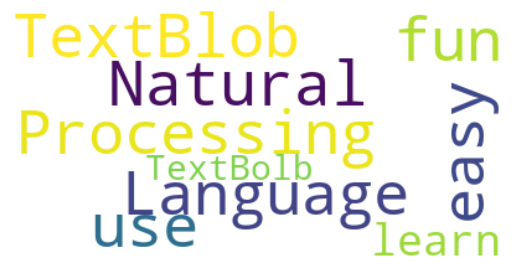

In [20]:
text = "Natural Language Processing with TextBlob is fun and easy to use. I like to learn TextBolb"
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#贝叶斯分型器
from nltk.classify import NaiveBayesClassifier
import random
from nltk.corpus import names
#分割数据集,比如600个数据，你要400个做train,200个做test
featuresets = '你要的数据集'
train_set, test_set = featuresets[201:], featuresets[:201]
classifier = NaiveBayesClassifier.train(train_set)
#显示最有效5个数据
classifier.show_most_informative_features(5)
#接下来就是自己的machine learning代码了


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 数据标准化, 数据转换为均值为0，标准差为1的标准正态分布
data = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0],
    [10.0, 11.0, 12.0]
])
print("Original Data:\n", data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
'''
fit_transform 方法首先拟合数据（计算均值和标准差），然后对数据进行标准化转换。
fit 方法只计算均值和标准差，但不进行转换。
transform 方法使用之前计算的均值和标准差对数据进行标准化。
'''
print("Standardized Data:\n", scaled_data)

Original Data:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Standardized Data:
 [[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [15]:
#把种类变换成数字，创造Dummy Variable
from sklearn.preprocessing import OneHotEncoder
data = np.array([
    ['red', 'small'],
    ['blue', 'large'],
    ['green', 'medium'],
    ['blue', 'small']
])
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data)
print("One-Hot Encoded Data:\n", encoded_data)
feature_names = encoder.get_feature_names_out(['color', 'size'])
print("Feature Names:\n", feature_names)

One-Hot Encoded Data:
 [[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]
Feature Names:
 ['color_blue' 'color_green' 'color_red' 'size_large' 'size_medium'
 'size_small']


In [ ]:
#这个需要具体的数据集，然后分成一个训练组，一个测试组，没具体数据时run了没用
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
#线性回归，也是要有数据集
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data, boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))